# Predicting the life happiness of a country using regression

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, mean_absolute_error

# machine learning (regression)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")


# Load the data

In [2]:
life_happiness = pd.read_csv('data/better-life-index-2024.csv')
life_happiness.head()

,Country,GDP per capita (USD),Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,...,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care,Life satisfaction
0,Australia,66589,NaN,19.4,NaN,37433.0,528768.0,3.1,73,1.0,...,92,2.7,92,83.0,85,67,0.9,12.5,14.36,7.1
1,Austria,59225,0.8,20.8,1.6,37001.0,309637.0,2.3,72,1.3,...,92,1.3,76,82.0,71,86,0.5,5.3,14.51,7.2
2,Belgium,55536,0.7,20.0,2.1,34884.0,447607.0,2.4,65,2.3,...,79,2.0,88,82.1,74,56,1.1,4.3,15.52,6.8
3,Canada,54866,0.2,22.9,2.6,34421.0,478240.0,3.8,70,0.5,...,90,2.9,68,82.1,89,78,1.2,3.3,14.57,7.0
4,Chile,16616,9.4,18.4,1.9,NaN,135787.0,7.0,56,NaN,...,62,1.3,47,80.6,60,41,2.4,7.7,NaN,6.2


In [3]:
life_happiness.shape

(38, 26)

# Exploring the data

In [4]:
life_happiness.columns

Index(['Country', 'GDP per capita (USD)',
       '  Dwellings without basic facilities', '  Housing expenditure',
       '  Rooms per person', '  Household net adjusted disposable income',
       '  Household net wealth', '  Labour market insecurity',
       '  Employment rate', '  Long-term unemployment rate',
       '  Personal earnings', '  Quality of support network',
       '  Educational attainment', '  Student skills', '  Years in education',
       '  Air pollution', '  Water quality',
       '  Stakeholder engagement for developing regulations',
       '  Voter turnout', '  Life expectancy', '  Self-reported health',
       '  Feeling safe walking alone at night', '  Homicide rate',
       '  Employees working very long hours',
       '  Time devoted to leisure and personal care', '  Life satisfaction'],
      dtype='object')

In [5]:
life_happiness.columns = [
    'country', 'gdp_per_capita_usd', 'dwellings_without_basic_facilities', 'housing_expenditure',
    'rooms_per_person', 'household_net_disposable_income', 'household_net_wealth',
    'labour_market_insecurity', 'employment_rate', 'long_term_unemployment_rate', 'personal_earnings',
    'support_network_quality', 'educational_attainment', 'student_skills', 'years_in_education',
    'air_pollution', 'water_quality', 'stakeholder_engagement', 'voter_turnout',
    'life_expectancy', 'self_reported_health', 'feeling_safe_walking_alone_at_night', 'homicide_rate',
    'employees_working_very_long_hours', 'time_devoted_to_leisure_and_personal_care', 'life_satisfaction'
]

life_happiness.head()

,country,gdp_per_capita_usd,dwellings_without_basic_facilities,housing_expenditure,rooms_per_person,household_net_disposable_income,household_net_wealth,labour_market_insecurity,employment_rate,long_term_unemployment_rate,...,water_quality,stakeholder_engagement,voter_turnout,life_expectancy,self_reported_health,feeling_safe_walking_alone_at_night,homicide_rate,employees_working_very_long_hours,time_devoted_to_leisure_and_personal_care,life_satisfaction
0,Australia,66589,NaN,19.4,NaN,37433.0,528768.0,3.1,73,1.0,...,92,2.7,92,83.0,85,67,0.9,12.5,14.36,7.1
1,Austria,59225,0.8,20.8,1.6,37001.0,309637.0,2.3,72,1.3,...,92,1.3,76,82.0,71,86,0.5,5.3,14.51,7.2
2,Belgium,55536,0.7,20.0,2.1,34884.0,447607.0,2.4,65,2.3,...,79,2.0,88,82.1,74,56,1.1,4.3,15.52,6.8
3,Canada,54866,0.2,22.9,2.6,34421.0,478240.0,3.8,70,0.5,...,90,2.9,68,82.1,89,78,1.2,3.3,14.57,7.0
4,Chile,16616,9.4,18.4,1.9,NaN,135787.0,7.0,56,NaN,...,62,1.3,47,80.6,60,41,2.4,7.7,NaN,6.2


In [6]:
# Check for missing values
life_happiness.isnull().sum()

country                                       0
gdp_per_capita_usd                            0
dwellings_without_basic_facilities            3
housing_expenditure                           3
rooms_per_person                              1
household_net_disposable_income               5
household_net_wealth                          9
labour_market_insecurity                      4
employment_rate                               0
long_term_unemployment_rate                   1
personal_earnings                             3
support_network_quality                       0
educational_attainment                        1
student_skills                                1
years_in_education                            1
air_pollution                                 0
water_quality                                 0
stakeholder_engagement                        0
voter_turnout                                 0
life_expectancy                               0
self_reported_health                    

In [7]:
life_happiness.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,38,38,Australia,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gdp_per_capita_usd,38.0,NaN,NaN,NaN,48139.184211,28940.5585,7327.0,26553.0,43469.5,59051.0,131384.0
dwellings_without_basic_facilities,35.0,NaN,NaN,NaN,3.051429,5.373977,0.0,0.2,0.5,3.0,25.9
housing_expenditure,35.0,NaN,NaN,NaN,20.494286,2.50258,14.7,18.65,20.6,21.8,27.4
rooms_per_person,37.0,NaN,NaN,NaN,1.675676,0.413928,1.0,1.4,1.7,1.9,2.6
household_net_disposable_income,33.0,NaN,NaN,NaN,30490.151515,8184.496163,16269.0,24590.0,29488.0,34984.0,51147.0
household_net_wealth,29.0,NaN,NaN,NaN,323959.62069,185528.628032,79245.0,188627.0,294735.0,370341.0,941162.0
labour_market_insecurity,34.0,NaN,NaN,NaN,5.182353,4.30028,1.0,2.625,3.9,5.775,21.7
employment_rate,38.0,NaN,NaN,NaN,68.657895,7.591874,48.0,65.25,70.0,74.0,80.0
long_term_unemployment_rate,37.0,NaN,NaN,NaN,1.737838,1.918094,0.0,0.8,1.2,2.2,10.8


Country is mainly made of unique values. `time_devoted_to_leisure_and_personal_care` column has 16 missing values, thus the need to drop it.

Life satisfaction ranges from 4.9 - 7.9

In [8]:
life_happiness.drop(['country', 'time_devoted_to_leisure_and_personal_care'], axis=1, inplace=True)

array([[<Axes: title={'center': 'gdp_per_capita_usd'}>,
        <Axes: title={'center': 'dwellings_without_basic_facilities'}>,
        <Axes: title={'center': 'housing_expenditure'}>,
        <Axes: title={'center': 'rooms_per_person'}>,
        <Axes: title={'center': 'household_net_disposable_income'}>],
       [<Axes: title={'center': 'household_net_wealth'}>,
        <Axes: title={'center': 'labour_market_insecurity'}>,
        <Axes: title={'center': 'employment_rate'}>,
        <Axes: title={'center': 'long_term_unemployment_rate'}>,
        <Axes: title={'center': 'personal_earnings'}>],
       [<Axes: title={'center': 'support_network_quality'}>,
        <Axes: title={'center': 'educational_attainment'}>,
        <Axes: title={'center': 'student_skills'}>,
        <Axes: title={'center': 'years_in_education'}>,
        <Axes: title={'center': 'air_pollution'}>],
       [<Axes: title={'center': 'water_quality'}>,
        <Axes: title={'center': 'stakeholder_engagement'}>,
     

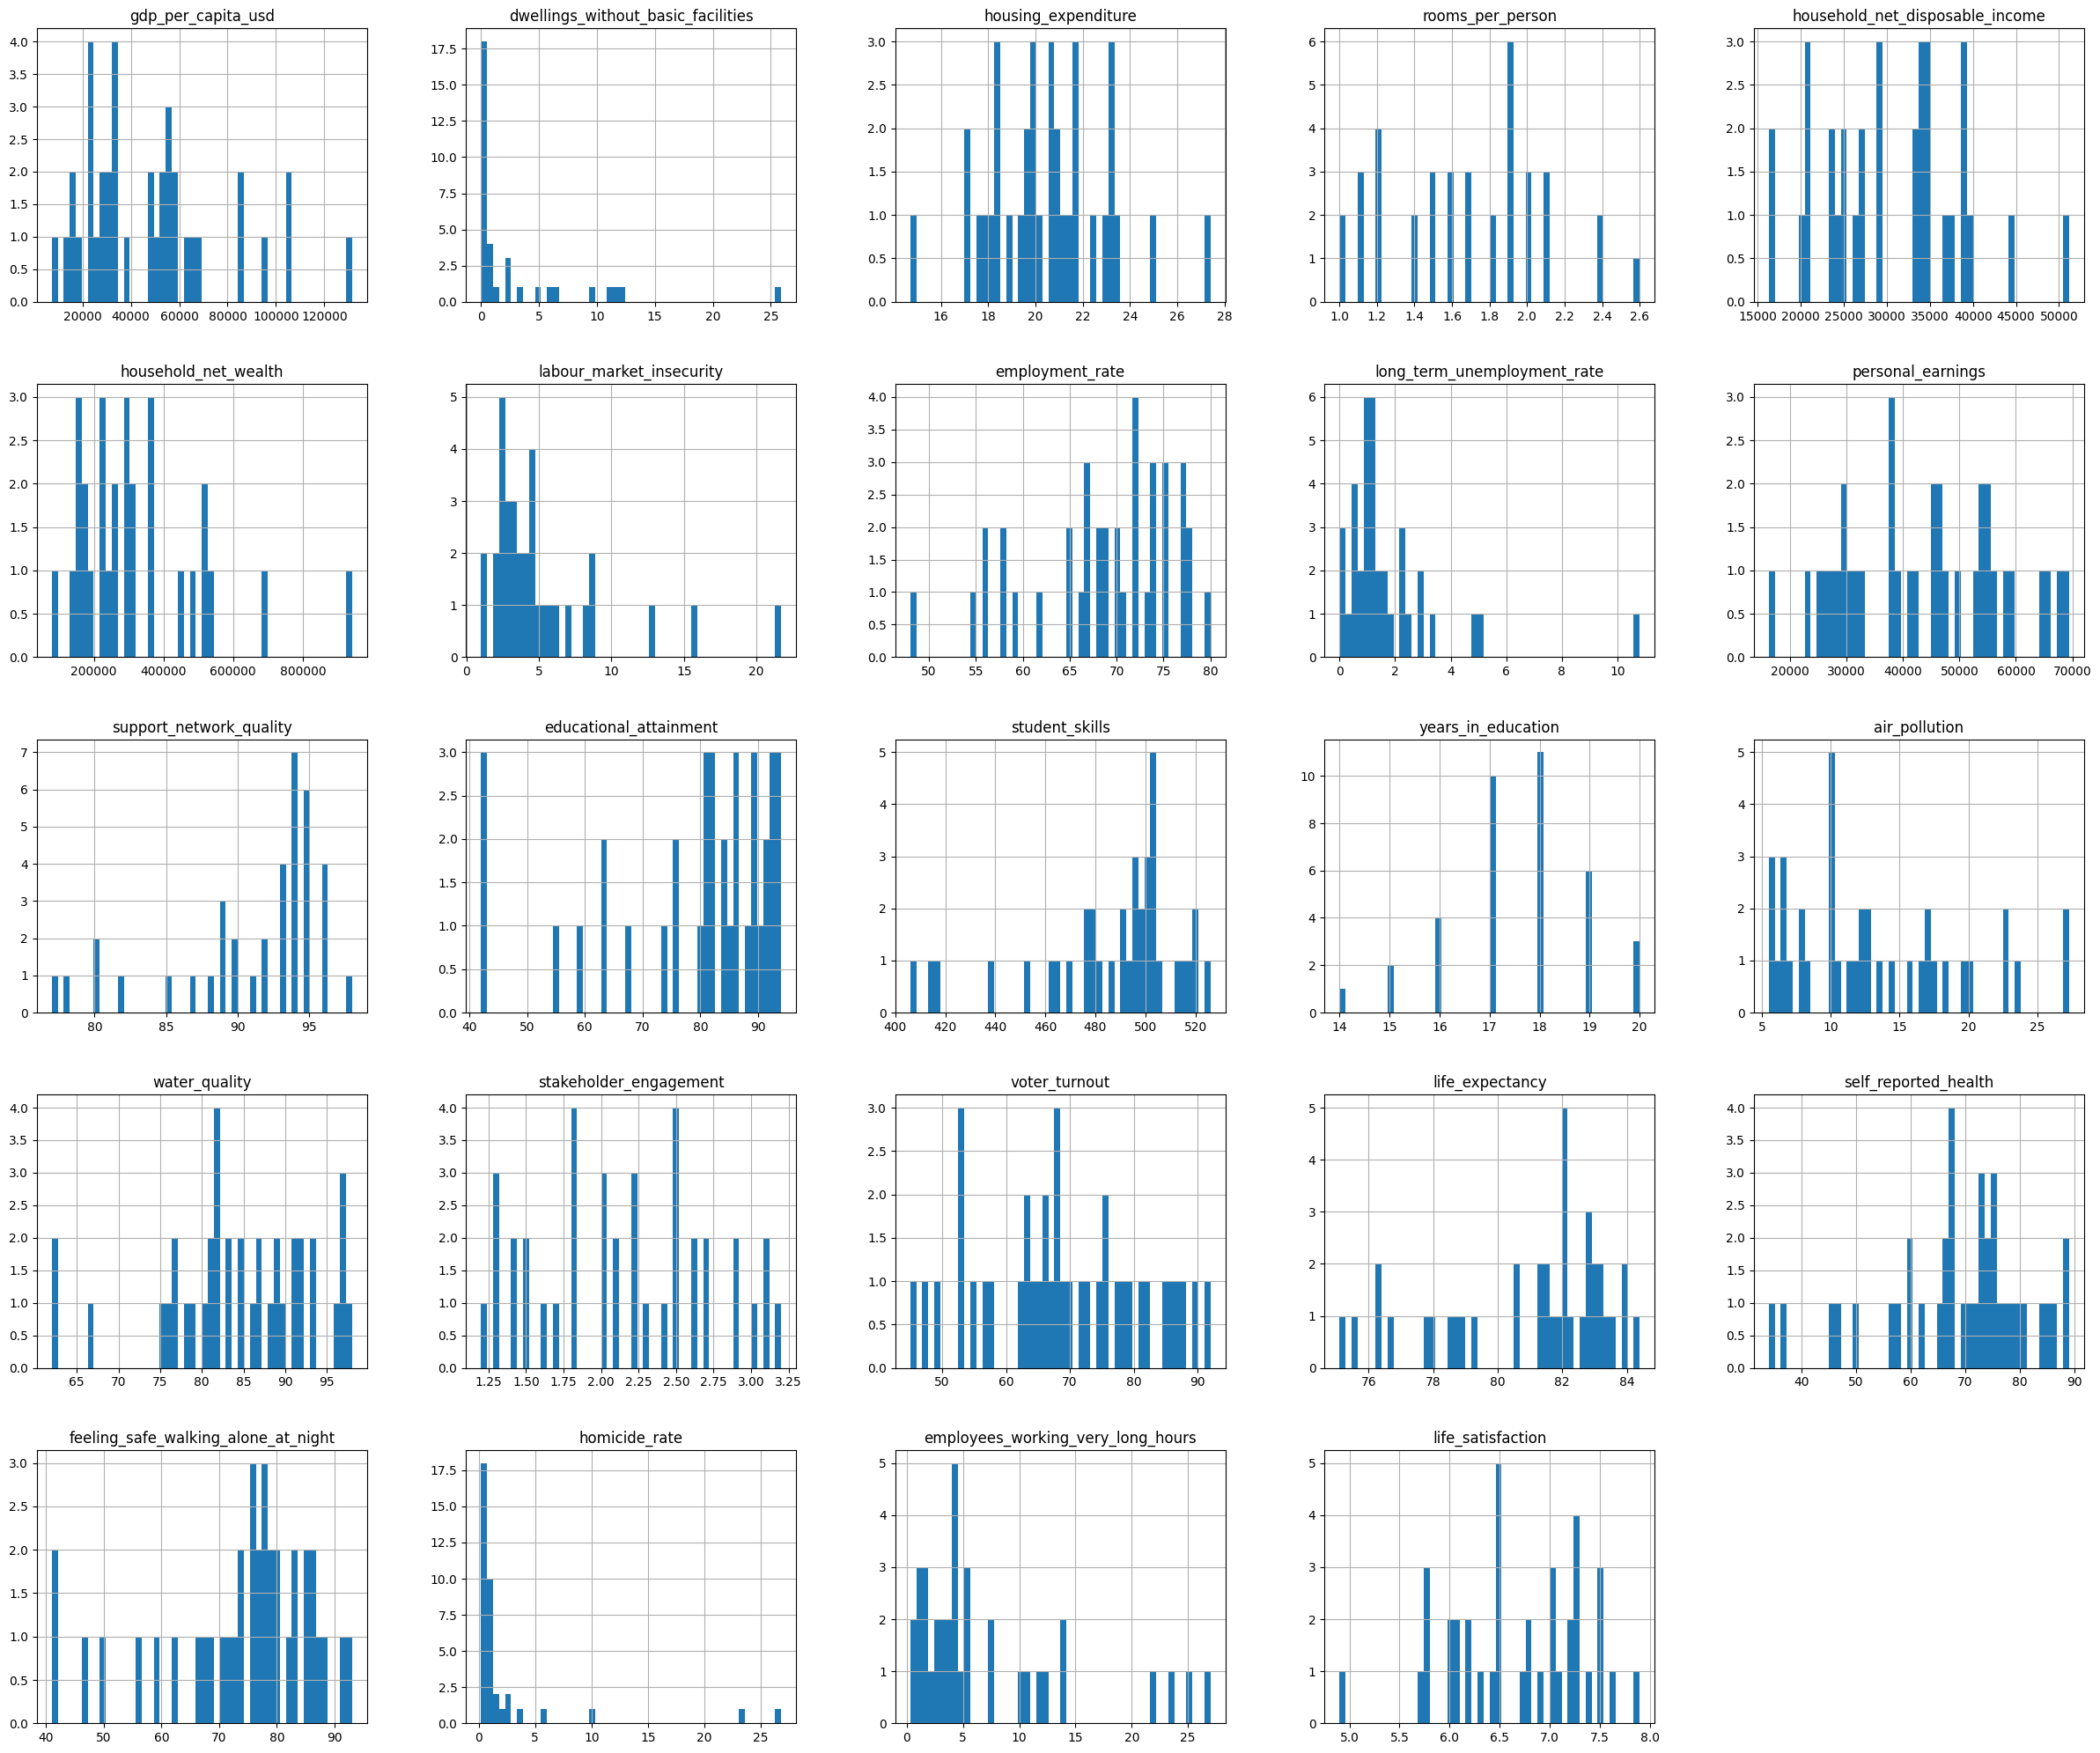

In [9]:
life_happiness.hist(bins=50, figsize=(30, 25))


Points to note:
1. use of different scales in the dataset
2. some columns have a high probability of having outliers


## Visualizations

In [10]:
visuals_set = life_happiness.copy()
visuals_set.columns

Index(['gdp_per_capita_usd', 'dwellings_without_basic_facilities',
       'housing_expenditure', 'rooms_per_person',
       'household_net_disposable_income', 'household_net_wealth',
       'labour_market_insecurity', 'employment_rate',
       'long_term_unemployment_rate', 'personal_earnings',
       'support_network_quality', 'educational_attainment', 'student_skills',
       'years_in_education', 'air_pollution', 'water_quality',
       'stakeholder_engagement', 'voter_turnout', 'life_expectancy',
       'self_reported_health', 'feeling_safe_walking_alone_at_night',
       'homicide_rate', 'employees_working_very_long_hours',
       'life_satisfaction'],
      dtype='object')

<Axes: xlabel='gdp_per_capita_usd', ylabel='life_satisfaction'>

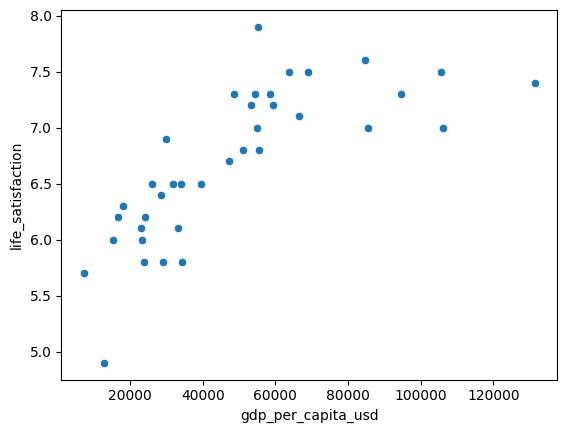

In [11]:
sns.scatterplot(x = 'gdp_per_capita_usd', y = 'life_satisfaction', data = visuals_set)

<Axes: xlabel='gdp_per_capita_usd', ylabel='life_satisfaction'>

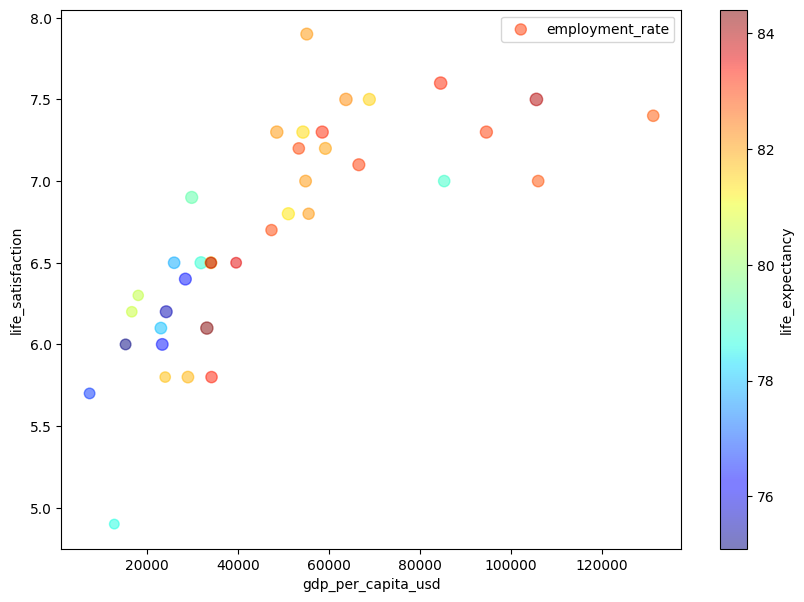

In [12]:
visuals_set.plot(kind='scatter', x='gdp_per_capita_usd', y='life_satisfaction', alpha=0.5,
                 s=visuals_set['employment_rate'], label='employment_rate', figsize=(10,7),
    c='life_expectancy', cmap=plt.get_cmap('jet'), colorbar=True,
    sharex=False)

interesting, right?
The higher GDP per capita, the higher the:
1. Life expenctancy (with a few exceptions)
2. Higher rates of employment
3. Life satisfaction (with some exceptions)


In [13]:
corr_matrix = visuals_set.corr()
corr_matrix['life_satisfaction'].sort_values(ascending=False)

life_satisfaction                      1.000000
personal_earnings                      0.772145
household_net_disposable_income        0.758496
gdp_per_capita_usd                     0.753770
water_quality                          0.686972
support_network_quality                0.682730
employment_rate                        0.675973
rooms_per_person                       0.597522
feeling_safe_walking_alone_at_night    0.529221
educational_attainment                 0.499092
life_expectancy                        0.483781
self_reported_health                   0.476146
student_skills                         0.416475
household_net_wealth                   0.390122
voter_turnout                          0.357317
housing_expenditure                    0.316743
years_in_education                     0.316506
stakeholder_engagement                 0.179452
homicide_rate                         -0.325432
long_term_unemployment_rate           -0.341519
employees_working_very_long_hours     -0

# Spliting the train and test Dataset

In [14]:
life_happiness['happiness_category'] = pd.cut(life_happiness['life_satisfaction'], bins=[0, 5.9, 6.9, np.inf], labels = [1, 2, 3])

<Axes: xlabel='happiness_category'>

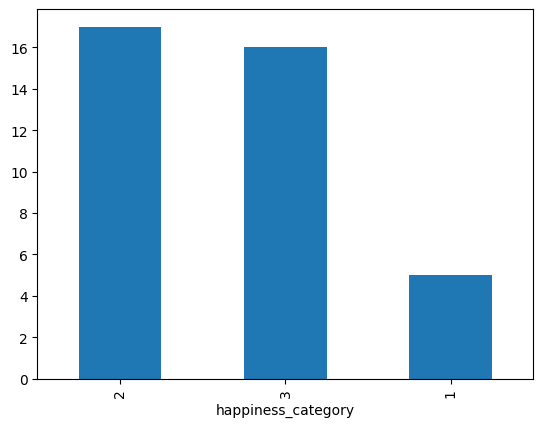

In [15]:
life_happiness['happiness_category'].value_counts().plot(kind='bar')

In [16]:
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(life_happiness, life_happiness['happiness_category']):
    train_set = life_happiness.loc[train_index]
    test_set = life_happiness.loc[test_index]

# print(train_set['happiness_category'].value_counts() / len(train_set))
# print(test_set['happiness_category'].value_counts() / len(test_set))

train_set = train_set.drop('happiness_category', axis=1)
test_set = test_set.drop('happiness_category', axis=1)

# Data Preparation

In [17]:
X, y = train_set.drop('life_satisfaction', axis=1), train_set['life_satisfaction']
cols = list(X)

pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

X_train = pipeline.fit_transform(X)


# Training the model

In [18]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
}

for name, model in enumerate(models):
    scores = cross_val_score(models[model], X_train, y, scoring='neg_mean_squared_error', cv=10)
    rmse_scores = np.sqrt(-scores)
    print(f'{model} RMSE: {rmse_scores.mean()}')

Linear Regression RMSE: 0.7447385977665237
Decision Tree RMSE: 0.4516440817384906
Random Forest RMSE: 0.3176729686665519


# Evaluation and cross validation of the data.

In [19]:
def cross_validtion(algorithm):
    scores = cross_val_score(algorithm, X_train, y, cv=10, scoring='neg_mean_squared_error')
    return np.sqrt(-scores)

def display_scores(scores):
    print("Mean Score: ",   scores.mean())
    print("Std: ", scores.std())

In [20]:
rf_reg = cross_validtion(RandomForestRegressor(n_estimators=1000))
display_scores(rf_reg)


Mean Score:  0.31325638070831957
Std:  0.18927776664342325


In [21]:
X_train.shape

(30, 23)

# Hyperparameter tuning

In [22]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [15, 16, 17, 18, 19, 20],
}

In [23]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train, y)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_features': [15, 16, 17, 18, 19, 20],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [24]:
grid_search.best_estimator_

RandomForestRegressor(max_features=15)

In [25]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.268184  , 0.09838502, 0.00189412, 0.02616159, 0.02308728,
       0.00439606, 0.01241215, 0.04202072, 0.03083282, 0.05246904,
       0.25048168, 0.01463628, 0.0080685 , 0.00276243, 0.03972678,
       0.02827474, 0.00336041, 0.01938786, 0.01075695, 0.00937633,
       0.03660839, 0.00668564, 0.01003121])

In [26]:
# columns and their importance
sorted(zip(feature_importances, cols), reverse=True)

[(np.float64(0.2681840038971684), 'gdp_per_capita_usd'),
 (np.float64(0.25048168025997614), 'support_network_quality'),
 (np.float64(0.0983850204962806), 'dwellings_without_basic_facilities'),
 (np.float64(0.052469041723172814), 'personal_earnings'),
 (np.float64(0.04202071654902067), 'employment_rate'),
 (np.float64(0.03972678205796553), 'air_pollution'),
 (np.float64(0.03660838723695345), 'feeling_safe_walking_alone_at_night'),
 (np.float64(0.030832818096665528), 'long_term_unemployment_rate'),
 (np.float64(0.028274743120180884), 'water_quality'),
 (np.float64(0.02616158791281331), 'rooms_per_person'),
 (np.float64(0.02308728492241888), 'household_net_disposable_income'),
 (np.float64(0.019387859274910425), 'voter_turnout'),
 (np.float64(0.014636278120721857), 'educational_attainment'),
 (np.float64(0.01241214965650417), 'labour_market_insecurity'),
 (np.float64(0.010756949978760722), 'life_expectancy'),
 (np.float64(0.010031211431731904), 'employees_working_very_long_hours'),
 (np.f

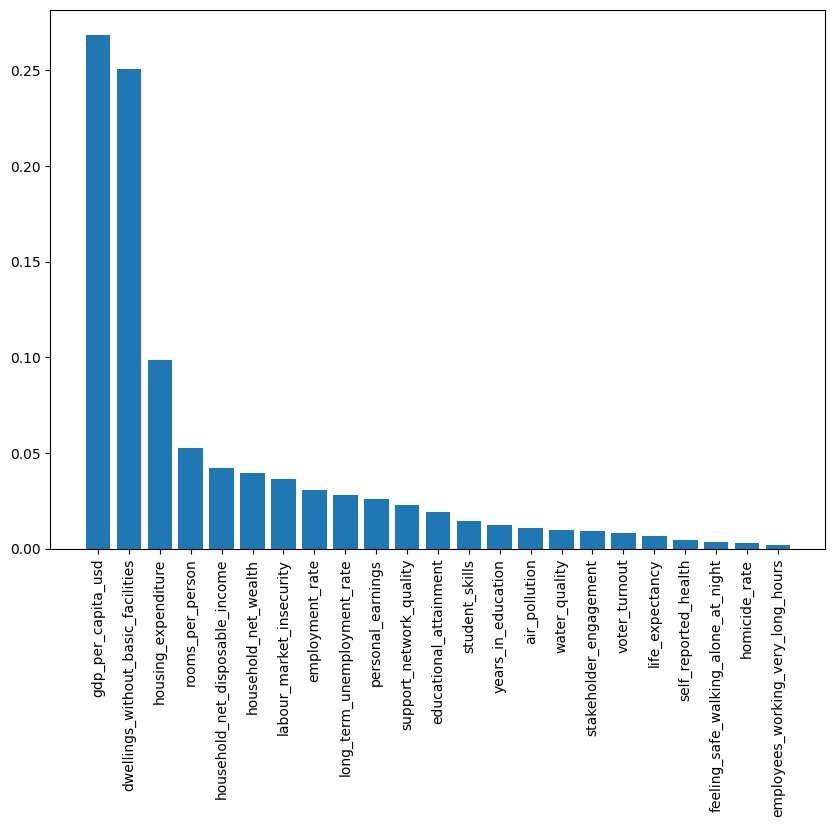

In [27]:
# plot the importance of each feature (sorted for highest to lowest)
feature_importances = sorted(feature_importances, reverse=True)

plt.figure(figsize=(10, 7))

plt.bar(cols, feature_importances)
plt.xticks(rotation=90)
plt.show()


# Using the test set to evaluate the model

# 

In [28]:
best_model = grid_search.best_estimator_

X_test, y_test = test_set.drop('life_satisfaction', axis=1), test_set['life_satisfaction']
X_test = pipeline.transform(X_test)

final_predictions = best_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_absolute_error = mean_absolute_error(y_test, final_predictions) 
print(f'Final RMSE: {final_rmse}, Final MAE: {final_absolute_error}')


Final RMSE: 0.4357854976935335, Final MAE: 0.36599999999999966


In [33]:
# get the prediction for the first instance in the dataset
test_instance = life_happiness.iloc[0].drop(['life_satisfaction', 'happiness_category'])
test_instance = pipeline.transform([test_instance])

# predict the life satisfaction for the first instance
prediction = best_model.predict(test_instance)

print(f'Predicted Life Satisfaction: {prediction[0]}')
print(f'Actual Life Satisfaction: {life_happiness.iloc[0]["life_satisfaction"]}')


Predicted Life Satisfaction: 7.110000000000006
Actual Life Satisfaction: 7.1


c:\Program Files\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
